<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-from-Files" data-toc-modified-id="Reading-from-Files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading from Files</a></span></li><li><span><a href="#Uninformed-Search" data-toc-modified-id="Uninformed-Search-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uninformed Search</a></span><ul class="toc-item"><li><span><a href="#Creating-Uninformed-Pacman-World" data-toc-modified-id="Creating-Uninformed-Pacman-World-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating Uninformed Pacman World</a></span></li><li><span><a href="#BFS" data-toc-modified-id="BFS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>BFS</a></span></li><li><span><a href="#IDS" data-toc-modified-id="IDS-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>IDS</a></span></li></ul></li><li><span><a href="#Informed-Search" data-toc-modified-id="Informed-Search-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Informed Search</a></span><ul class="toc-item"><li><span><a href="#What-is-our-Heuristic?" data-toc-modified-id="What-is-our-Heuristic?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What is our Heuristic?</a></span></li><li><span><a href="#Why-this-Heuristic-is-Admissable?" data-toc-modified-id="Why-this-Heuristic-is-Admissable?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Why this Heuristic is Admissable?</a></span></li><li><span><a href="#Why-this-Heuristic-is-Consistent?" data-toc-modified-id="Why-this-Heuristic-is-Consistent?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Why this Heuristic is Consistent?</a></span></li><li><span><a href="#Astar-Search" data-toc-modified-id="Astar-Search-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Astar Search</a></span></li></ul></li><li><span><a href="#Comparing-Algorithms" data-toc-modified-id="Comparing-Algorithms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing Algorithms</a></span><ul class="toc-item"><li><span><a href="#Compare-Tables" data-toc-modified-id="Compare-Tables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Compare Tables</a></span><ul class="toc-item"><li><span><a href="#Testcase-1" data-toc-modified-id="Testcase-1-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Testcase 1</a></span></li><li><span><a href="#Testcase-2" data-toc-modified-id="Testcase-2-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Testcase 2</a></span></li><li><span><a href="#Testcase-3" data-toc-modified-id="Testcase-3-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Testcase 3</a></span></li><li><span><a href="#Testcase-4" data-toc-modified-id="Testcase-4-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Testcase 4</a></span></li><li><span><a href="#Testcase-5" data-toc-modified-id="Testcase-5-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Testcase 5</a></span></li></ul></li><li><span><a href="#Comparing-Algorithms" data-toc-modified-id="Comparing-Algorithms-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comparing Algorithms</a></span><ul class="toc-item"><li><span><a href="#Optimality" data-toc-modified-id="Optimality-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Optimality</a></span></li><li><span><a href="#Time-Complexity" data-toc-modified-id="Time-Complexity-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Time Complexity</a></span></li><li><span><a href="#Space-Complexity" data-toc-modified-id="Space-Complexity-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Space Complexity</a></span></li></ul></li><li><span><a href="#Compare-Plots" data-toc-modified-id="Compare-Plots-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Compare Plots</a></span></li></ul></li></ul></div>

# AI Fall 98 - Computer Assignment 1 ( PacMan )
**Farzad Habibi ( 810195383 )**


Goal of this computer assignment is getting more familier with searching algorithms. From searching algorithms we will learn `BFS`, `IDS`, and `Astar Search`. All of these algorithms have an optimal answer but with different exectuion time. We compare these algorithm at last of this document.

In [1]:
import time # To calculate exec times.
from collections import deque # It uses for BFS's frontier
import math # To having inf. 
from queue import PriorityQueue # It uses for Astar's frontier
import pandas as pd # For last table of documentation
import matplotlib.pyplot as plt # For ploting
import seaborn as sns # For Make Ploting Beautiful
sns.set()

## Reading from Files 
At first we create a class for reading from inputs(file / string of map). 
In this code we read from files and make a class to represent pacman world. These class have some methods :
* to read from input file
* to convert 1d position to it's 2d position in map.
* to convert 2d position to it's 1d position
* to check state of our world and see that it is goal state or not
* to find and store agent positions

In [2]:
class PacmanWorld :
    def __init__(self, input_data, file=False):
        if file :
            self.file_path = input_data
            self.read_input()
        else :
            self.data = input_data
        self.ncols = self.data.find('\n')
        self.find_agents_pos()
        

    def read_input(self):
        self.data = ''
        with open (self.file_path, "r") as myfile:
            self.data=myfile.read()
    
    def is_it_goal(self):
        return self.data.find('1') < 0 and self.data.find('2') < 0 and self.data.find('3') < 0
    
    def get_data(self):
        return self.data
    
    def change_2d_to_1d(self, x, y):
        return x*(self.ncols+1) + y
    
    def change_1d_to_2d(self, i):
        x = int(i / (self.ncols + 1))
        y = i - (self.ncols + 1) * x
        return x, y
        

    def index_2d(self, search):
        return self.change_1d_to_2d(self.data.find(search))
    
    def find_agents_pos(self):
        self.p_i, self.p_j = self.index_2d('P')
        self.q_i, self.q_j = self.index_2d('Q')

    def print(self):
        print(self.data)

So we can make our world by file path input and see it's values like data and agents position :

In [3]:
world = PacmanWorld('./tests/test2', file=True)
world.print()
print(f'Agent P position is {world.p_i}, {world.p_j} and Agent Q position is {world.q_i}, {world.q_j}')

%%%%%%
%   1%
%    %
%   P%
%% %%%
%   3%
%1   %
%%% %%
%3  Q%
%%%%%%
Agent P position is 3, 4 and Agent Q position is 8, 4


**IN** this class, I didn't change map data from string to other data structures like 2d array. Because it got more time to find agents and other processes.  

## Uninformed Search

### Creating Uninformed Pacman World
In this kind of solution, our world is a little difference from first definition of `PacmanWorld`. We should get all feasible actions which every agent can make; therefore, we define a new world for this kind of solution which inherited our first world.

This class has a main method named `get_feasible_actions` which got all agent P and agent Q actions that they can made. It uses other methods (like `move` and `check_pos`) to implement this goal. 

In [4]:
class UninformedPacmanWorld(PacmanWorld):
    def __init__(self, input_file_path, file=False):
        super().__init__(input_file_path, file)

    def check_pos(self, agent, i, j):
        if i < 0 and j < 0 : 
            return False
        index = self.change_2d_to_1d(i, j)
        if agent == 'P' and ( self.data[index] == 'Q' or self.data[index] == '2' ) :
            return False
        if agent == 'Q' and ( self.data[index] == 'P' or self.data[index] == '1' ) :
            return False     
        return False if self.data[index] == '%' else True
    
    def move(self, agent, i, j):
        (x, y) = (self.p_i, self.p_j) if agent == 'P' else (self.q_i, self.q_j)
        index_first = x*(self.ncols+1) + y
        index_sec = i*(self.ncols+1) + j
        new = self.data[:index_first] + ' ' + self.data[index_first+1:]
        return new[:index_sec] + agent + new[index_sec+1:]
        
        
    def get_feasible_actions_for(self, agent):
        actions = []
        (i, j) = (self.p_i, self.p_j) if agent == 'P' else (self.q_i, self.q_j)
        if self.check_pos(agent, i+1, j) : actions.append(self.move(agent, i+1, j))
        if self.check_pos(agent, i, j+1) : actions.append(self.move(agent, i, j+1))
        if self.check_pos(agent, i-1, j) : actions.append(self.move(agent, i-1, j))
        if self.check_pos(agent, i, j-1) : actions.append(self.move(agent, i, j-1))
        return actions
        
    def get_feasible_actions(self):
        return self.get_feasible_actions_for('P') + self.get_feasible_actions_for('Q')


In [5]:
ui_world = UninformedPacmanWorld('./tests/test1', file=True)

With this class we can get all possible actions like this :

In [6]:
for e in ui_world.get_feasible_actions(): 
    print(e)

%%%%%%%%%%%%%
%    %2%    %
%   3Q      %
% %%%%% %%%%%
%1      % % %
%%% %%  %1% %
%    %    % %
%3      %   %
% % %%%P %% %
%   %1      %
%%%%%%%%%%%%%
%%%%%%%%%%%%%
%    %2%    %
%   3Q      %
% %%%%% %%%%%
%1      % % %
%%% %%  %1% %
%    % P  % %
%3      %   %
% % %%%  %% %
%   %1      %
%%%%%%%%%%%%%
%%%%%%%%%%%%%
%    %2%    %
%   3Q      %
% %%%%% %%%%%
%1      % % %
%%% %%  %1% %
%    %    % %
%3    P %   %
% % %%%  %% %
%   %1      %
%%%%%%%%%%%%%
%%%%%%%%%%%%%
%    %2%    %
%   3 Q     %
% %%%%% %%%%%
%1      % % %
%%% %%  %1% %
%    %    % %
%3     P%   %
% % %%%  %% %
%   %1      %
%%%%%%%%%%%%%
%%%%%%%%%%%%%
%    %2%    %
%   Q       %
% %%%%% %%%%%
%1      % % %
%%% %%  %1% %
%    %    % %
%3     P%   %
% % %%%  %% %
%   %1      %
%%%%%%%%%%%%%


### BFS


For running `BFS` algorithm at first we make our test world (here I used `ui_world` which ran test1 as initial world). 
Then our algorithm started to run. 

This algorithm has a queue as it's frontier and a set as it's explored. 
* At first we add intial state into frontier and then pop it from the queue. 
* Then all possible actions from initial values which does not explored before, will add to the frontier 
* and next we will redo these steps until we find goal state.

`BFS` is an optimal search algotrithm.

In [7]:
def bfs(initial_state):
    """ 
    A function to compute bfs for an uninformal world.

    Parameters: 
        initial_state (UninformalPacmanWorld): inital world

    Returns: 
        move_num: number of moves to get goal
        total_move: number of all states which had seen during run
        total_seperate_moves : number of seperate state which seen. here it is like total move
        ans: final answer UniformalPacmanWorld
    """
    move_num = 0
    total_move = 1
    node = initial_state
    if node.is_it_goal(): return move_num, node
    frontier = deque([node.data])
    frontier_depth = deque([0])
    explored = set([node.data])
    while True : 
        if len(frontier) == 0: return -1, -1, -1, None
        node = UninformedPacmanWorld(frontier.popleft())
        move_num = frontier_depth.popleft() + 1
        for action in node.get_feasible_actions():
            if  not action in explored :
                child = UninformedPacmanWorld(action)
                if child.is_it_goal(): return move_num, total_move, total_move, child
                frontier.append(child.get_data())
                total_move += 1
                frontier_depth.append(move_num)
                explored.add(child.data)

For example we run this algorithm on an `UninformedWorld`.

In [8]:
ui_world = UninformedPacmanWorld('./tests/test1', file=True)
start = time.time() 
moves, total_moves, total_seperate_moves, ans = bfs(ui_world)
end = time.time()
ans.print()

%%%%%%%%%%%%%
%    %Q%    %
%           %
% %%%%% %%%%%
%P      % % %
%%% %%  % % %
%    %    % %
%       %   %
% % %%%  %% %
%   %       %
%%%%%%%%%%%%%


In [9]:
print(f'Total time is {end - start}')
print(f'Total moves for finding answer is {total_moves}')
print(f'Total seperate moves for finding answer is {total_seperate_moves}')
print(f'Number of moves to got the answer is {moves}')

Total time is 3.8838019371032715
Total moves for finding answer is 140672
Total seperate moves for finding answer is 140672
Number of moves to got the answer is 33


As you see this algorithm has a small execution time for this number of state. At my first try, it had more execution time and I started to change my data structures into string instead of 2d array. This move save a lot of time for me in this algorithm. 

### IDS

For running `IDS` algorithm at first we make class named `ExploredNode` to add into explored set. Why we make this class? because in ids algorithm it is possible to see a repeated state but in less depth; therefore, we should add depth also in explored set. But if we just use a tuple in set we should explore a lots of more paths. We should just adds nodes which have less depth not all nodes with different depth. In that situation our execution time got more.


In [10]:
class ExploredNode():
    def __init__(self, depth, data):
        self.depth = depth
        self.data = data
    def __hash__(self):
        return hash((self.data))
    def __eq__(self, other):
        return self.data == other.data and self.depth <= other.depth

For example if we have a set of these nodes :

In [11]:
s = set([ExploredNode(5, 'a')])

It seems all nodes with bigger depth is in that set :

In [12]:
ExploredNode(10, 'a') in s

True

In `IDS` algorithm, at first we make our test world (here I used `ui_world` which ran test1 as initial world). 
Then our algorithm started to run. 

This algorithm has a stack as it's frontier (we used dequeue data structre and it's pop method) and a set (set of `ExploredNode`) as it's explored. 
* We have a loop to increas depth in every iteration of it. Actualy at every iteration we increase depth and run inner loop which is a limited dfs. 
* At every itteration we reset all of data structures to initial values.
* In limited dfs : 
    * We pop first node from stack
    * If it's depth is our limit we didn't add it's children to frontier
    * Else we add chidlren to frontier

This `IDS` is an optimal search algotrithm.

In [13]:
def ids(initial_state):
    """ 
    A function to compute ids for an uninformal world.

    Parameters: 
        initial_state (UninformalPacmanWorld): inital world

    Returns: 
        move_num: number of moves to get goal
        total_move: number of all states which had seen during run
        total_seperate_moves : number of seperate state which seen
        ans: final answer UniformalPacmanWorld
    """
    if initial_state.is_it_goal(): return 0, 0, 0, node
    depth = 0
    exit = False
    total_move_num = 1
    while not exit:
        total_seperate_moves = 1
        frontier = deque([initial_state.data])
        frontier_depth = [0]
        explored = set([ExploredNode(0, initial_state.data)])
        depth += 1
        while True:
            if len(frontier) == 0 : break # Depth explored
            node = UninformedPacmanWorld(frontier.pop())
            curr_depth = frontier_depth.pop()
            if curr_depth >= depth : continue 
            for action in reversed(node.get_feasible_actions()):
                if not ExploredNode(curr_depth+1, action) in explored:
                    total_move_num += 1
                    if not ExploredNode(math.inf, action) in explored : total_seperate_moves += 1
                    child = UninformedPacmanWorld(action)
                    if child.is_it_goal(): return curr_depth+1,total_move_num, total_seperate_moves, child
                    explored.add(ExploredNode(curr_depth+1, action))
                    frontier.append(child.data)
                    frontier_depth.append(curr_depth + 1)

For example we run this algorithm on an `UninformedWorld`.

In [14]:
ui_world = UninformedPacmanWorld('./tests/test1', file=True)
start = time.time() 
moves, total_moves, total_seperate_moves, ans = ids(ui_world)
ans.print()
end = time.time()

%%%%%%%%%%%%%
%    %Q%    %
%           %
% %%%%% %%%%%
%P      % % %
%%% %%  % % %
%    %    % %
%       %   %
% % %%%  %% %
%   %       %
%%%%%%%%%%%%%


In [15]:
print(f'Total time is {end - start}')
print(f'Total moves for finding answer is {total_moves}')
print(f'Total seperate moves for finding answer is {total_seperate_moves}')
print(f'Number of moves to got the answer is {moves}')

Total time is 153.98135709762573
Total moves for finding answer is 4593008
Total seperate moves for finding answer is 105105
Number of moves to got the answer is 33


## Informed Search

For our Informed world we create a new class which have some extra method from uninformed world. This class (`InformedPacmanWorld`) has some methods to compute heuristic of the world.

In [16]:
import math
class InformedPacmanWorld(UninformedPacmanWorld):
    def __init__(self, input_file_path, file=False):
        super().__init__(input_file_path, file)
        
    def find_food(self, food):
        x = []
        begin = 0
        while begin < len(self.data):
            begin = self.data.find(food, begin+1)
            if begin == -1 :
                break;
            x.append(begin)
        return x

    def find_foods(self):
        self.ps_foods = [self.change_1d_to_2d(x) for x in self.find_food('1') + self.find_food('3')]
        self.qs_foods = [self.change_1d_to_2d(x) for x in self.find_food('2') + self.find_food('3')]
        
    def find_min_manhatan(self, x, y, l):
        min_manhatan = math.inf
        for i in l:
            manhatan_distance = abs(i[0] - x) + abs(i[1] - y)
            if manhatan_distance < min_manhatan :
                min_manhatan = manhatan_distance
        return min_manhatan

    def manhatan_heuristic(self):
        self.find_foods()
        number_of_foods = len(self.ps_foods) + len(self.qs_foods)
        numner_of_foods = number_of_foods - 1 if number_of_foods >= 1 else 0
        return min(self.find_min_manhatan(self.p_i, self.p_j, self.ps_foods),
                   self.find_min_manhatan(self.q_i, self.q_j, self.qs_foods)) + int((number_of_foods)/2)

### What is our Heuristic?
Our heueristic is `minimum manhatan distance from all foods + [number of remained food after eating nearest food / 2]` .

We will compute it in `manhatan_heuristic` method of `InformedPacmanWorld` class. In this method, first we find all of world foods position, then find number of all foods. After that we returns minimum  computation of heuristic from P foods and Q foods + number of remained foods / 2 

### Why this Heuristic is Admissable?
This heuristic is admissable. Assume that our minimum manhatan distance to all food be `min(x)` and `x` be the nearest food. Also assume that `n` be number of all remaning foods after eating x. 

From definition a heuristic is addmisable that $h(n) \leq g(n) $ which $h(n)$ is heuristic of state and $g(n)$ is actual path cost to goal.  

**PROVE:** Mininmum path from our state to goal is `min(x) + n` which is eating x by exploring min(x) in one path and eating n other foods with just one move for every of them; beside, our heuristic is `min(x) + n/2` which always is less than equal to minimum path. 

### Why this Heuristic is Consistent?
This heuristic is also consistent. Assume above symbols. 

From definition a heuristic is consistent if we have a state `C` after state `A` real cost of A to C be greater than equal of cost that implied by heuristics. 
$cost(AtoC) \geq h(A) - h(C)$

**PROVE:** Worst case happend when in state `C` and `A`, agent goes manhatan distance to got `C`. We can assume `min(x1)` as manhatan distance of first move(state A), and `min(x2)` as manhatan distance of second move(state C).

We should prove that :
$$
cost(AtoC) \geq h(A) - h(C)
$$

We have : 
$$
h(A) = min(x_1) + \lfloor \frac{n}{2} \rfloor
$$

$$
h(C) = min(x_2) + \lfloor \frac{n-1}{2} \rfloor
$$

$$
cost(AtoC) = min(x_1)
$$

So for this eqution we have : 
$$
h(A) - h(C) = min(x_1) + \lfloor \frac{n}{2} \rfloor - min(x_2) - \lfloor \frac{n-1}{2} \rfloor 
\begin{equation*}
 = \begin{cases}
             min(x_1) - min(x_2)   & \text{if } n = 0 \text{ or } n \text{ is odd } \\
             min(x_1) - min(x_2) + 1  & \text{if } n \neq 0 \text{ and } n \text{ is even }
       \end{cases} \quad
\end{equation*}
$$


$$
cost(AtoC) = min(x_1)
$$

From this we can recognize from above equetions that bellow assignment should  always be less than equal of `zero` which it always is.
$$
\begin{equation*}
 0 \geq \begin{cases}
             - min(x_2)   & \text{if } n = 0 \text{ or } n \text{ is odd } \\
             - min(x_2) + 1  & \text{if } n \neq 0 \text{ and } n \text{ is even }
       \end{cases} \quad
\end{equation*}
$$

### Astar Search
This algorithm is very similar to `BFS` algorithm, but it uses a priority queue as it's frontier instead. At first we make our test world (here I used `ui_world` which ran test1 as initial world). 
Then our algorithm started to run. 

This algorithm has a priority queue as it's frontier and a set as it's explored. It also use f(state) which is h(s) + cost_to(s) as priority of every node in queue.
* At first we add intial state into frontier and then pop it from the queue. 
* Then all possible actions from initial values which does not explored before, will add to the frontier 
* and next we will redo these steps until we find goal state.

This `Astar` search is an optimal search algotrithm. Becasue it uses an admissable and consistent heuristic.

In [17]:
def A_star(initial_state):
    """ 
    A function to compute ids for an informal world.

    Parameters: 
        initial_state (InformalPacmanWorld): inital world

    Returns: 
        move_num: number of moves to get goal
        total_move: number of all states which had seen during run
        total_seperate_moves : number of seperate state which seen
        ans: final answer InformalPacmanWorld
    """
    move_num = 0
    total_move = 1
    total_seperate_moves = 1
    node = initial_state
    if node.is_it_goal(): return move_num, node
    frontier = PriorityQueue()
    frontier.put((0+initial_state.manhatan_heuristic(), initial_state.data, 0)) # f(n), data, path_cost
    explored = set([ExploredNode(0, node.data)])
    while True : 
        if frontier.empty(): return -1, -1, -1, None
        state = frontier.get()
        node = UninformedPacmanWorld(state[1])
        path_cost = state[2]
        for action in node.get_feasible_actions():
            if  not ExploredNode(path_cost+1, action) in explored :
                total_move += 1
                if not ExploredNode(math.inf, action) in explored : total_seperate_moves += 1
                child = InformedPacmanWorld(action)
                if child.is_it_goal(): return path_cost+1, total_move, total_seperate_moves, child
                frontier.put(((path_cost+1)+child.manhatan_heuristic(), child.data, path_cost+1))
                explored.add(ExploredNode(path_cost+1, child.data))

In [18]:
i_world = InformedPacmanWorld('./tests/test1', file=True)
start = time.time() 
moves, total_moves, total_seperate_moves, ans = A_star(i_world)
ans.print()
end = time.time()

%%%%%%%%%%%%%
%    %Q%    %
%           %
% %%%%% %%%%%
%P      % % %
%%% %%  % % %
%    %    % %
%       %   %
% % %%%  %% %
%   %       %
%%%%%%%%%%%%%


In [19]:
print(f'Total time is {end - start}')
print(f'Total moves for finding answer is {total_moves}')
print(f'Total seperate moves for finding answer is {total_seperate_moves}')
print(f'Number of moves to got the answer is {moves}')

Total time is 5.396594762802124
Total moves for finding answer is 105787
Total seperate moves for finding answer is 105706
Number of moves to got the answer is 33


As you see it got answer in less state. But execution time is a little more becasue of heuristic computing overhead. 

## Comparing Algorithms


### Compare Tables
At First we run every testcase and compute all variables into a pandas data frame. These variables are `Answer Cost`, `Total Seen States`, `Total Seperate Seen States`, and `Execution Time`.

In [20]:
sample_table = pd.DataFrame([], index=['BFS','IDS', 'A*Search'],
                     columns=['Answer Cost', 'Total Seen States', 'Total Seperate Seen States', 'Execution Time'])


In [21]:
test_cases_path = ['./tests/test1', './tests/test2', './tests/test3', './tests/test4', './tests/test5']
all_tables = []

def run_alg_in_3_itteration(alg, input_world):
    mean_time, total_states, total_seperate_states, moves_num = 0, 0, 0, 0;
    for i in range(0, 3):
        ui_world = UninformedPacmanWorld(test_case_path, file=True)
        start = time.time()
        moves_num, total_states, total_seperate_states, ans = alg(input_world)
        end = time.time()
        mean_time += end - start
    return moves_num, total_states, total_seperate_states, mean_time/3

for test_case_path in test_cases_path:
    table = sample_table.copy()
    ui_world = UninformedPacmanWorld(test_case_path, file=True)
    i_world = InformedPacmanWorld(test_case_path, file=True)
    # Running BFS
    mean_time, total_states, total_seperate_states, moves_num = run_alg_in_3_itteration(bfs, ui_world)
    table.loc['BFS']['Answer Cost'] = mean_time
    table.loc['BFS']['Total Seen States'] = total_states
    table.loc['BFS']['Total Seperate Seen States'] = total_seperate_states 
    table.loc['BFS']['Execution Time'] = moves_num
    # Running IDS
    mean_time, total_states, total_seperate_states, moves_num = run_alg_in_3_itteration(ids, ui_world)
    table.loc['IDS']['Answer Cost'] = mean_time
    table.loc['IDS']['Total Seen States'] = total_states
    table.loc['IDS']['Total Seperate Seen States'] = total_seperate_states 
    table.loc['IDS']['Execution Time'] = moves_num
    # Running A*Search
    mean_time, total_states, total_seperate_states, moves_num = run_alg_in_3_itteration(A_star, i_world)
    table.loc['A*Search']['Answer Cost'] = mean_time
    table.loc['A*Search']['Total Seen States'] = total_states
    table.loc['A*Search']['Total Seperate Seen States'] = total_seperate_states # Its like total states in bfs
    table.loc['A*Search']['Execution Time'] = moves_num
    all_tables.append(table)

#### Testcase 1

In [22]:
all_tables[0]

,Answer Cost,Total Seen States,Total Seperate Seen States,Execution Time
BFS,33,140672,140672,3.23961
IDS,33,4593008,105105,152.494
A*Search,33,105787,105706,5.3254


#### Testcase 2

In [23]:
all_tables[1]

,Answer Cost,Total Seen States,Total Seperate Seen States,Execution Time
BFS,17,3226,3226,0.0696327
IDS,17,29157,318,0.760059
A*Search,17,1927,1923,0.0791834


#### Testcase 3

In [24]:
all_tables[2]

,Answer Cost,Total Seen States,Total Seperate Seen States,Execution Time
BFS,20,2704,2704,0.0595206
IDS,20,45644,2652,1.24893
A*Search,20,1434,1434,0.0599507


#### Testcase 4

In [25]:
all_tables[3]

,Answer Cost,Total Seen States,Total Seperate Seen States,Execution Time
BFS,17,10624,10624,0.239029
IDS,17,81808,4069,2.40807
A*Search,17,3296,3292,0.137777


#### Testcase 5

In [26]:
all_tables[4]

,Answer Cost,Total Seen States,Total Seperate Seen States,Execution Time
BFS,13,359,359,0.00627438
IDS,13,2803,335,0.0657474
A*Search,13,205,205,0.00796707


### Comparing Algorithms 

#### Optimality
All of these algorithms return optimal answers. BFS is optimal because we move in depth. IDS is optimal too because we limit depth of DFS. In A* if we have an admissable and consistent heuristic, we can say it is an optimal algorithm. Here we have a heueristic with these charactrastics which proven above.  

#### Time Complexity
For `BFS` if we assume that we have b-ary tree of depth d time compelxity is number of nodes in that which is $O(b^d)$.

For `IDS` Because of we have limited depth first search we should have time complexity of every itteration. So time complexity is $O((d+1)b^0 + d b^1 + (d-1)b^2 + … + b^d)$.

For `A*Search` time complexity is number of nodes which heuristic expands. 

As you see in above tables time order is  $IDS \gt A^* \gt BFS$. Altough number of seen states is in $IDS \gt BFS \gt A^*$ but time of A* is a little more than bfs. it is because of **computing heuristic** overheads. For bigger maps which this overhead can be ignored we can say time of A* is less than BFS; on the other hand, IDS have a lot of more time complexity in this problem. Becasue we have a big depth for solotiouns. It is always slower than BFS and A*.

#### Space Complexity
Space complexity of `BFS` is like it's time complexity which is number of it nodes. ( $O(b^d)$ ).

`IDS` have less space for computing. It have an space complexity of $O(bd)$ and its why people use IDS instead of BFS.

`A*` also like BFS have an exponential space comlexity but because of less nodes which seen in this algorithm we can say we hope it got less space. 

To sum up we can say here A* and BFS can be good answers for this problem. They have near time complexity and have less seen state. On the other hand I work on optimization of BFS more. At my first try BFS had more execution time and I started to change my data structures into string instead of 2d array. This move save a lot of time for me in BFS. If I had that matrix at first it may got more time to execute from A*. 

### Compare Plots

In [27]:
bfs_data = [(table.loc['BFS']['Answer Cost'], table.loc['BFS']['Execution Time'], 'test' + str(i+1)) 
       for i, table in enumerate(all_tables)]
ids_data = [(table.loc['IDS']['Answer Cost'], table.loc['IDS']['Execution Time'], 'test' + str(i+1)) 
       for i, table in enumerate(all_tables)]
Astar_data = [(table.loc['A*Search']['Answer Cost'], table.loc['A*Search']['Execution Time'], 'test' + str(i+1)) 
       for i, table in enumerate(all_tables)]

In [29]:
def plot_alg(data):
    data.sort()
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    t = [i[2] for i in data]
    plt.plot(x, y)
    plt.xlabel(xlabel='Depth')
    plt.ylabel(ylabel='Execution Time(s)')
    for i in data :
        plt.scatter(i[0], i[1], marker='x', color='r')
        plt.text(i[0] + 0.1, i[1] +0.1, i[2], fontsize=8)

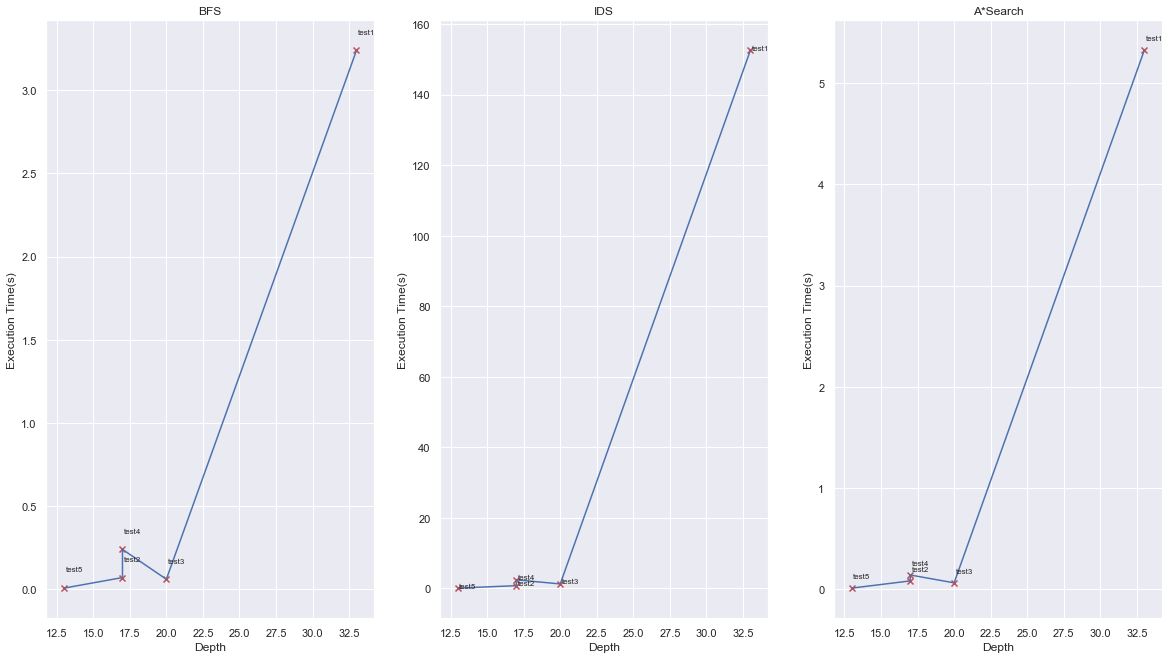

In [30]:
plt.figure(figsize=(20, 11))
plt.subplot(131)
plt.title('BFS')
plot_alg(bfs_data)
plt.subplot(132)
plt.title('IDS')
plot_alg(ids_data)
plt.subplot(133)
plt.title('A*Search')
plot_alg(Astar_data)